In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [31]:
df['gender'].value_counts()


female    518
male      482
Name: gender, dtype: int64

In [4]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [5]:
df['parental level of education']=df['parental level of education'].replace('some high school','high school')

In [6]:
df['parental level of education'].unique()

array(['high school', 'some college', "associate's degree",
       "bachelor's degree", "master's degree"], dtype=object)

<AxesSubplot:ylabel='parental level of education'>

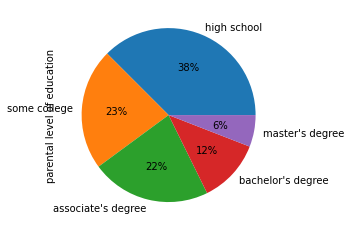

In [9]:
df['parental level of education'].value_counts().plot(kind='pie',autopct='%1.0f%%')

In [61]:
df.groupby(['parental level of education'])['math score','reading score','writing score'].mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_10608\366030242.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['parental level of education'])['math score','reading score','writing score'].mean()


,math score,reading score,writing score
parental level of education,,,
associate's degree,67.977477,71.018018,70.031532
bachelor's degree,69.288136,73.000000,73.381356
high school,62.448000,65.632000,63.589333
master's degree,70.254237,75.949153,75.677966
some college,67.128319,69.566372,69.035398


# Avg scores



In [11]:
df1=df
df1


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [37]:
c=df1.groupby(by=df1['gender']).sum()
for i in range(0,c.shape[0]):
    c.iloc[i,:]=c.iloc[i,:]/df['gender'].value_counts()[i]
    
    

c

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [60]:
df.groupby(['gender'])['math score','reading score','writing score'].mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_10608\1920965652.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['gender'])['math score','reading score','writing score'].mean()


,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [57]:
df.groupby(['test preparation course'])['math score','reading score','writing score'].mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_10608\3302394220.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['test preparation course'])['math score','reading score','writing score'].mean()


,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


# Calculating variance of data 

In [59]:
df.groupby(['gender'])['math score','reading score','writing score'].var()

C:\Users\hp\AppData\Local\Temp\ipykernel_10608\2940166398.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['gender'])['math score','reading score','writing score'].var()


,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


In [58]:
df.groupby(['test preparation course'])['math score','reading score','writing score'].var()

C:\Users\hp\AppData\Local\Temp\ipykernel_10608\2307679454.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['test preparation course'])['math score','reading score','writing score'].var()


,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


# data for top 25%

In [63]:
df1['math score'].quantile(.75)

77.0

In [66]:
df1[df1['math score']>77]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
430,female,group A,some college,standard,completed,78,87,91
431,female,group B,bachelor's degree,free/reduced,none,78,79,76
432,female,group D,bachelor's degree,standard,none,78,82,79
433,female,group D,high school,standard,none,78,81,80
434,female,group D,bachelor's degree,free/reduced,none,78,90,93
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
